<a href="https://colab.research.google.com/github/hemrajrai/Facebook1/blob/main/WF_Team3_Analysis_Visualization_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WellsFargoTeam3_Hem_Raj_Rai


GoogleDrive:


**Analysis and Visualization of Customer Segments Part I**


In [ ]:
!pip install mysql-connector-python
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import missingno as msno
import scipy
%matplotlib inline


ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import mysql.connector

# Database configuration
config = {
    'user': 'root',
    'password': 'T%%ZI<#e7qh2=8HH',
    'host': '34.30.157.44',
    'database': 'customer_segmentation'
}

# Establishing the connection
try:
    conn = mysql.connector.connect(**config)
    if conn.is_connected():
        print("Connection established successfully")

        # SQL query
        query = "SELECT * FROM customer"

        # Fetch data into a DataFrame
        df = pd.read_sql(query, conn)

        # Print the first 5 rows of the DataFrame
        print(df.head())

except mysql.connector.Error as err:
    print(f"Error: {err}")

# Close connection after fetching the data
finally:
    if conn.is_connected():
        conn.close()
        print("Connection closed")


Connection established successfully
   CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19           15.0              39
1           2    Male   21           15.0              81
2           3  Female   20           16.0               6
3           4  Female   23           16.0              77
4           5  Female   31           17.0              40
Connection closed


<ipython-input-3-2b7edccbdf89>:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,202.000000,202.000000,202.000000,202.000000
mean,101.500000,38.678218,61.252475,50.366337
std,58.456537,14.005700,27.041163,25.811303
min,1.000000,18.000000,15.000000,1.000000
25%,51.250000,28.000000,42.000000,35.000000
50%,101.500000,36.000000,62.000000,50.000000
75%,151.750000,49.000000,78.000000,73.000000
max,202.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      202 non-null    int64  
 1   Gender          202 non-null    object 
 2   Age             202 non-null    int64  
 3   Annual_Income   202 non-null    float64
 4   Spending_Score  202 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.0+ KB


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


Checking Na Values:

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


<Axes: >

<Figure size 300x400 with 0 Axes>

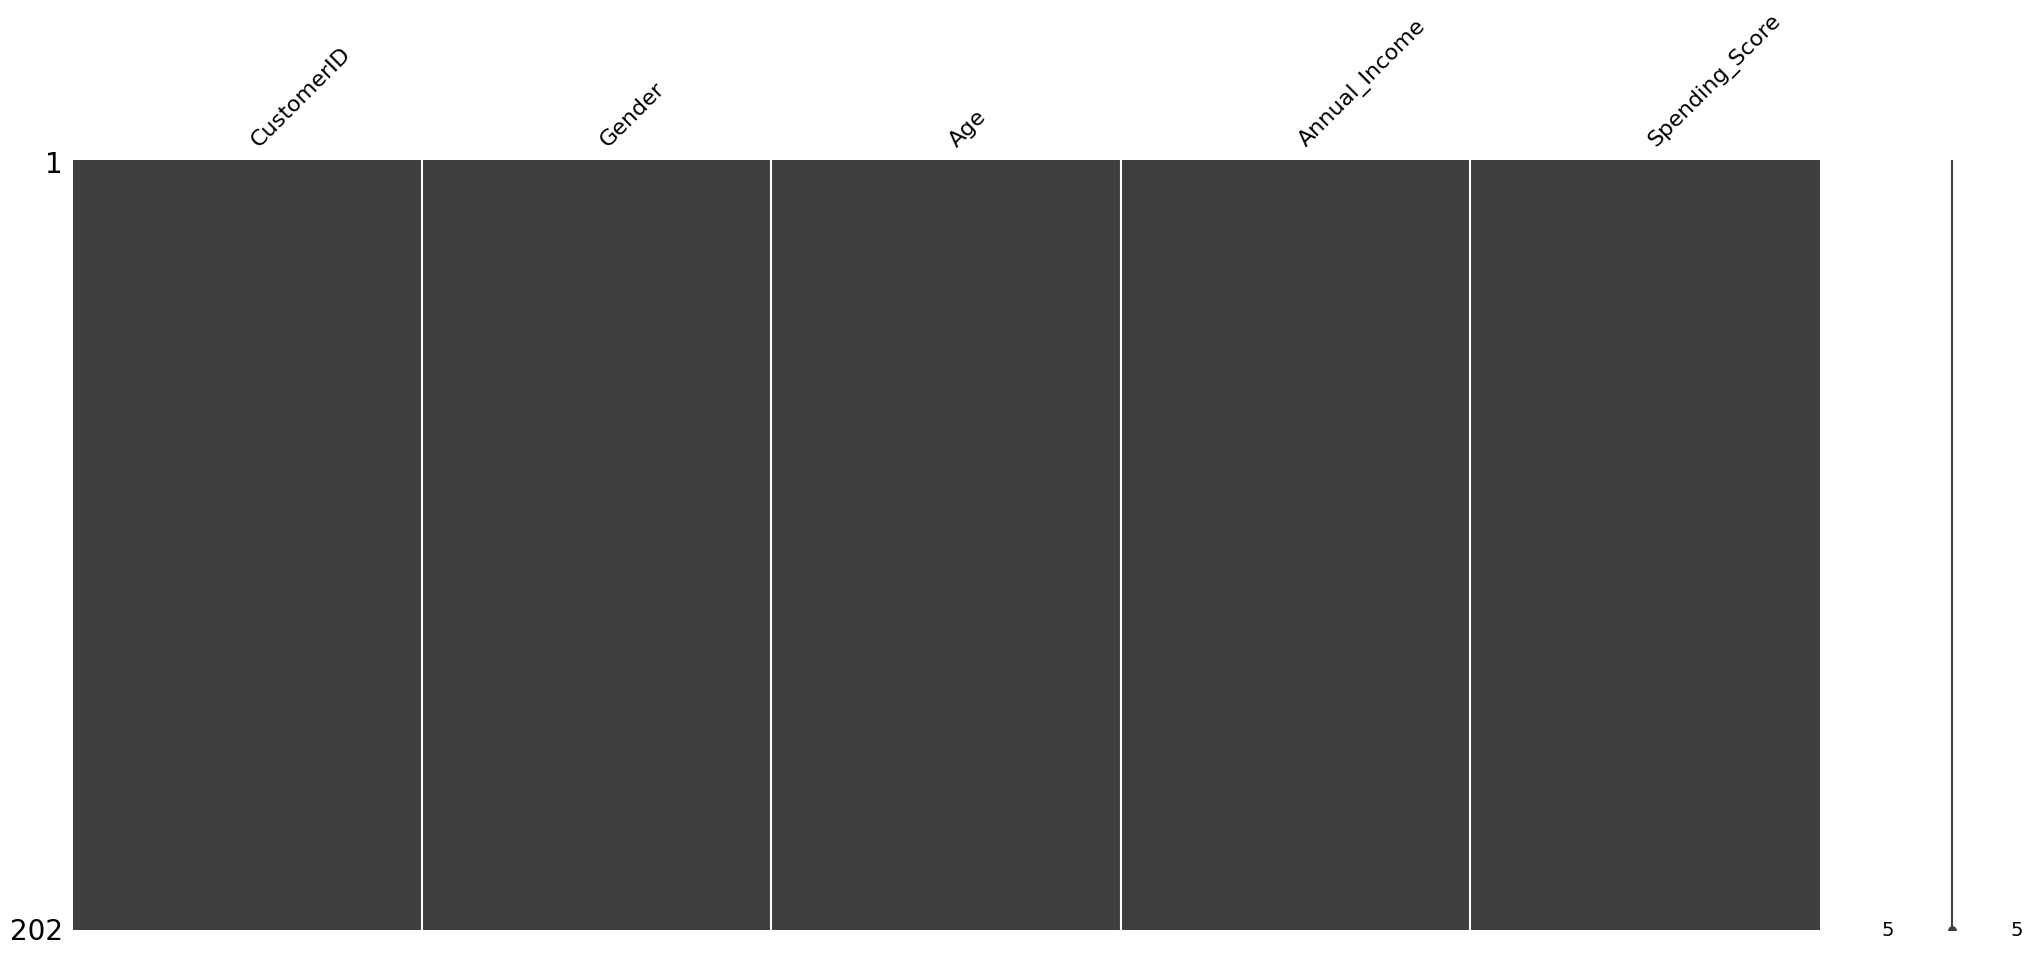

In [ ]:
missing_values_count = df.isna().sum()
print(missing_values_count)
plt.figure(figsize=(3, 4))
msno.matrix(df)

Some Statistical Analysis:

In [ ]:
max_age = df['Age'].max()
min_age = df['Age'].min()
mn_age = df["Age"].mean()
md_age = df["Age"].median()
sd_age = df["Age"].std()

max_income = df['Annual_Income'].max()
min_income = df['Annual_Income'].min()
mn_ann_income = df["Annual_Income"].mean()
md_income = df["Annual_Income"].median()
sd_income = df["Annual_Income"].std()


mn_spn_score = df["Spending_Score"].mean()


print(f"Maximum age: {max_age}")
print(f"Minimum age: {min_age}")
print(f"Mean of Age: {mn_age}")
print(f"Median of Age: {md_age}")
print(f"Standard Deviation of Age: {sd_age}")

print(f"Maximum Annual Income (k$): {max_income}")
print(f"Minimum Annual Income (k$): {min_income}")
print(f"Mean of Annual Income (k$): {mn_ann_income}")
print(f"Median of Annual Income (k$): {md_income}")
print(f"Standard Deviation of Annual Income (k$): {sd_income}")


print(f"Mean of Spending Score: {mn_spn_score}")

Maximum age: 70
Minimum age: 18
Mean of Age: 38.67821782178218
Median of Age: 36.0
Standard Deviation of Age: 14.005699649738524
Maximum Annual Income (k$): 137.0
Minimum Annual Income (k$): 15.0
Mean of Annual Income (k$): 61.25247524752475
Median of Annual Income (k$): 62.0
Standard Deviation of Annual Income (k$): 27.04116299884733
Mean of Spending Score: 50.366336633663366


Histogram of Customer's Age:

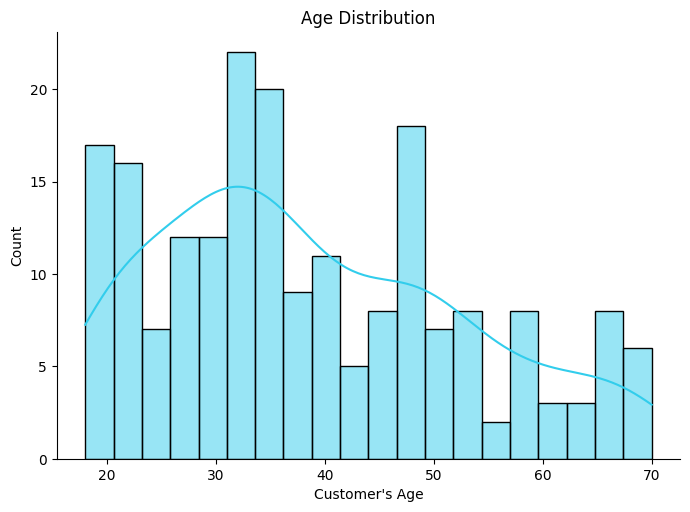

In [ ]:
sns.displot(df["Age"], bins=20, kde=True, color='#32CDEC', aspect=1.4)
plt.xlabel("Customer's Age")
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

Histogram of Customer's Annual Income($k):

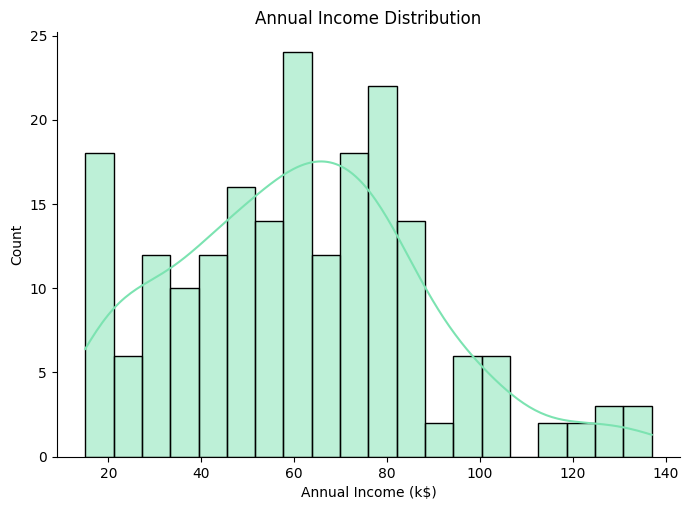

In [ ]:
sns.displot(df["Annual_Income"], bins=20, kde=True, color='#7CE3B1', aspect=1.4)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Annual Income Distribution')
plt.show()

Histogram of Customer's Spending Score (1-100):


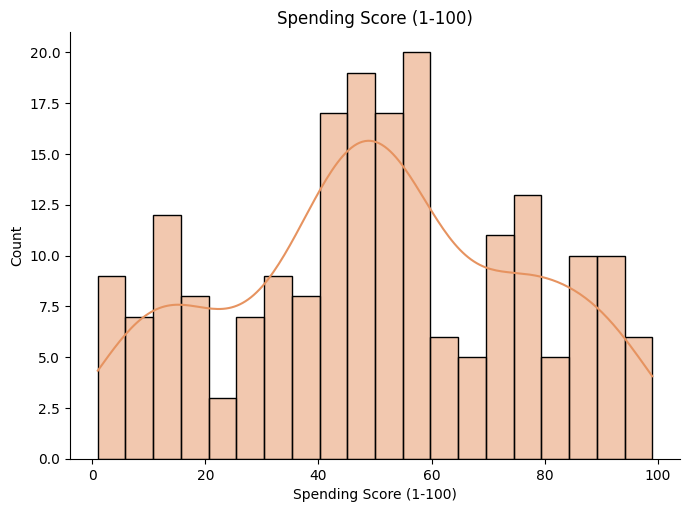

In [ ]:
sns.displot(df["Spending_Score"], bins=20, kde=True, color='#E69360', aspect=1.4)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.title('Spending Score (1-100)')
plt.show()

Age Distribution:

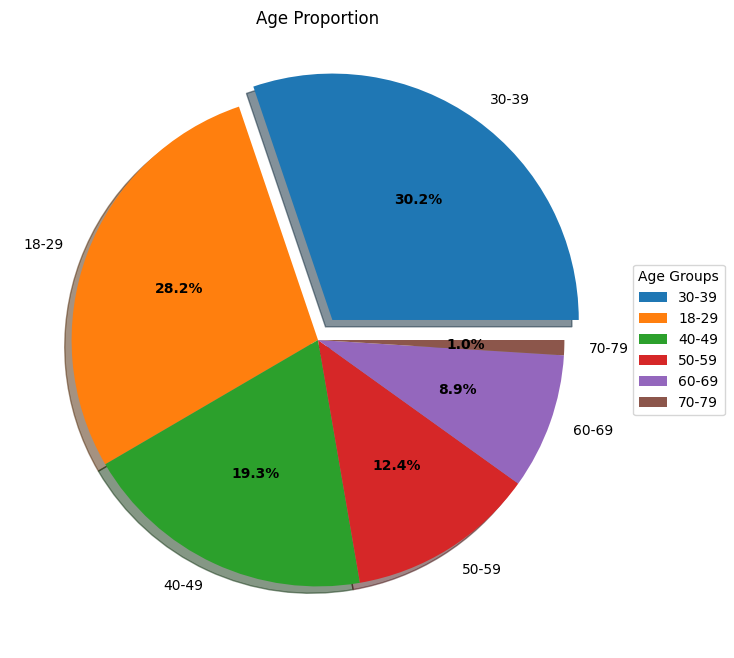

In [ ]:
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_counts = df['Age Group'].value_counts()
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0, 0, 0, 0, 0)
wedges, texts, autotexts = ax.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%',
                                   startangle=0, explode=explode, shadow=True)
ax.legend(wedges, age_counts.index, title="Age Groups", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Age Proportion")
plt.show()

Male vs Female:

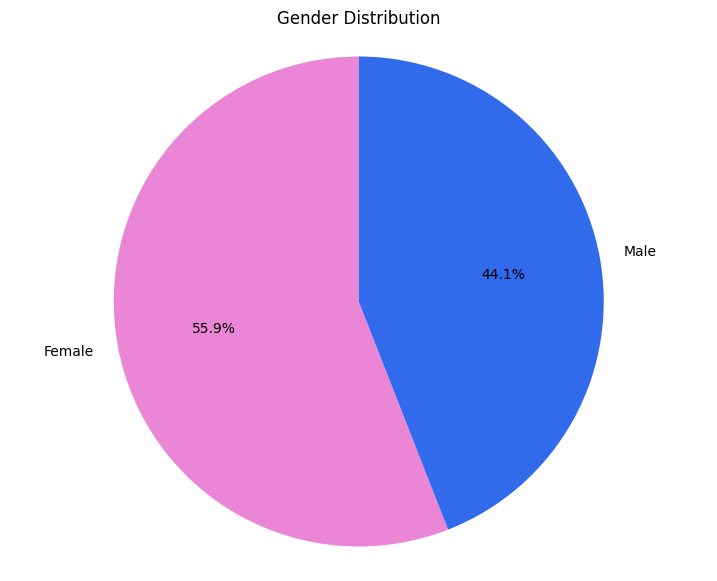

In [ ]:
gender_counts = df['Gender'].value_counts()
color_map = {'Male': '#326AEC', 'Female': '#EB85D5'}
colors = [color_map[label] for label in gender_counts.index]
plt.figure(figsize=(9, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Age vs Annual Income:

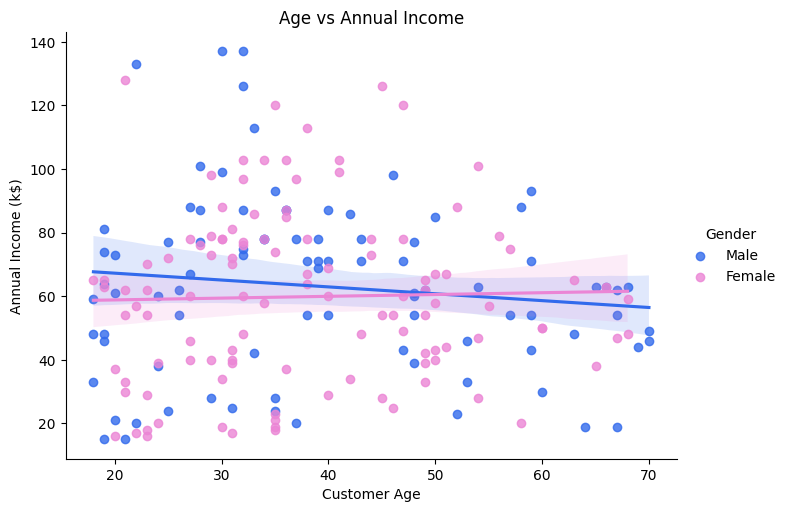

In [ ]:
custom_palette = {'Male': '#326AEC', 'Female': '#EB85D5'}
sns.lmplot(x='Age', y='Annual_Income', data=df, aspect=1.4, height=5, hue="Gender", palette=custom_palette)
plt.xlabel('Customer Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.show()

Measurement of Correlation between Age and Spending Score:

In [ ]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']
correlation_male = df_male[['Age', 'Annual_Income']].corr().iloc[0, 1]
correlation_female = df_female[['Age', 'Annual_Income']].corr().iloc[0, 1]
print(f"Correlation between Age and Annual Income for Males: {correlation_male}")
print(f"Correlation between Age and Annual Income for Females: {correlation_female}")

Correlation between Age and Annual Income for Males: -0.12189379418306327
Correlation between Age and Annual Income for Females: 0.02694480427840018


Age vs Spending Score:

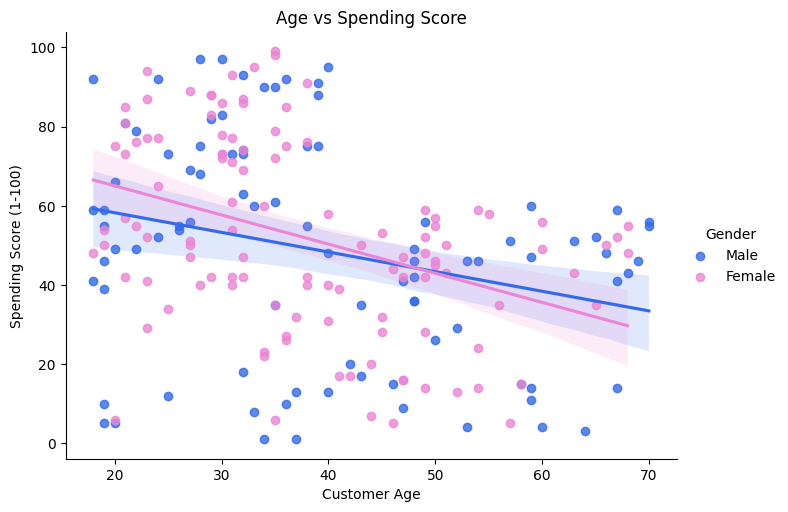

In [ ]:
custom_palette = {'Male': '#326AEC', 'Female': '#EB85D5'}
sns.lmplot(x='Age', y='Spending_Score',  data=df, aspect=1.4, height=5, hue="Gender", palette=custom_palette)
plt.xlabel('Customer Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.show()

Measurement of Correlation between Age and Spending Score:

In [ ]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']
correlation_male = df_male[['Age', 'Spending_Score']].corr().iloc[0, 1]
correlation_female = df_female[['Age', 'Spending_Score']].corr().iloc[0, 1]
print(f"Correlation between Age and Spending Score for Males: {correlation_male}")
print(f"Correlation between Age and Spending Score for Females: {correlation_female}")

Correlation between Age and Spending Score for Males: -0.27778399874812576
Correlation between Age and Spending Score for Females: -0.3857319398635365


Age vs Spending Score:

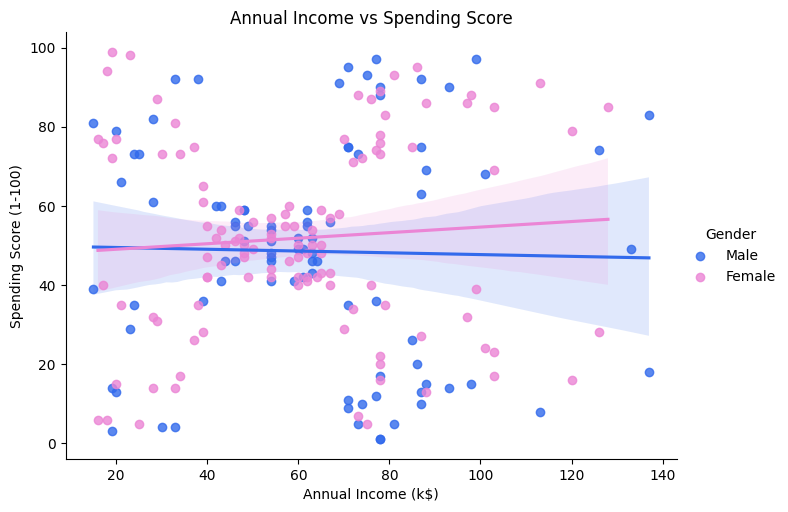

In [ ]:
custom_palette = {'Male': '#326AEC', 'Female': '#EB85D5'}
sns.lmplot(x='Annual_Income', y='Spending_Score',data=df, aspect=1.4, height=5, hue="Gender", palette=custom_palette)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

Measurment of Correlation between Annual Income and Spending Score:



In [ ]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']
correlation_male = df_male[['Annual_Income', 'Spending_Score']].corr().iloc[0, 1]
correlation_female = df_female[['Annual_Income', 'Spending_Score']].corr().iloc[0, 1]
print(f"Correlation between Annual Income and Spending Score for Males: {correlation_male}")
print(f"Correlation between Annual Income and Spending Score for Females: {correlation_female}")

Correlation between Annual Income and Spending Score for Males: -0.02227889157565321
Correlation between Annual Income and Spending Score for Females: 0.07724619245288847


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


score = pd.read_csv("/content/drive/MyDrive/data/Mall_Customers.csv", encoding='latin1', on_bad_lines='skip')
score.describe()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Spending Score Prediction Model:

In [ ]:
##1. Split int X & y
X = score.drop("Spending Score (1-100)", axis=1)

y = score["Spending Score (1-100)"]
X.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer




categorical_features = ["Gender"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder= "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[  0.,   1.,   1.,  19.,  15.],
       [  0.,   1.,   2.,  21.,  15.],
       [  1.,   0.,   3.,  20.,  16.],
       [  1.,   0.,   4.,  23.,  16.],
       [  1.,   0.,   5.,  31.,  17.],
       [  1.,   0.,   6.,  22.,  17.],
       [  1.,   0.,   7.,  35.,  18.],
       [  1.,   0.,   8.,  23.,  18.],
       [  0.,   1.,   9.,  64.,  19.],
       [  1.,   0.,  10.,  30.,  19.],
       [  0.,   1.,  11.,  67.,  19.],
       [  1.,   0.,  12.,  35.,  19.],
       [  1.,   0.,  13.,  58.,  20.],
       [  1.,   0.,  14.,  24.,  20.],
       [  0.,   1.,  15.,  37.,  20.],
       [  0.,   1.,  16.,  22.,  20.],
       [  1.,   0.,  17.,  35.,  21.],
       [  0.,   1.,  18.,  20.,  21.],
       [  0.,   1.,  19.,  52.,  23.],
       [  1.,   0.,  20.,  35.,  23.],
       [  0.,   1.,  21.,  35.,  24.],
       [  0.,   1.,  22.,  25.,  24.],
       [  1.,   0.,  23.,  46.,  25.],
       [  0.,   1.,  24.,  31.,  25.],
       [  1.,   0.,  25.,  54.,  28.],
       [  0.,   1.,  26.,

In [ ]:
pd.DataFrame(transformed_X)

,0,1,2,3,4
0,0.0,1.0,1.0,19.0,15.0
1,0.0,1.0,2.0,21.0,15.0
2,1.0,0.0,3.0,20.0,16.0
3,1.0,0.0,4.0,23.0,16.0
4,1.0,0.0,5.0,31.0,17.0
...,...,...,...,...,...
195,1.0,0.0,196.0,35.0,120.0
196,1.0,0.0,197.0,45.0,126.0
197,0.0,1.0,198.0,32.0,126.0
198,0.0,1.0,199.0,32.0,137.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)


model = RandomForestRegressor()

model.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
model.score(X_test, y_test)

0.2385000861649501

In [ ]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

12.554750000000002

In [ ]:
df = pd.DataFrame(data={"Actual Values": y_test,
                        "Predicted Values": y_preds})
df["Differences"] = df["Predicted Values"] - df["Actual Values"]
df

,Actual Values,Predicted Values,Differences
95,52,49.72,-2.28
15,79,76.11,-2.89
30,4,11.80,7.80
158,1,69.60,68.60
128,11,41.81,30.81
115,50,48.37,-1.63
69,47,51.33,4.33
170,13,41.21,28.21
174,13,26.11,13.11
45,65,66.95,1.95


In [ ]:
new_data = np.array([ 0.,   1.,   9.,  64.,  19.]).reshape(1, -1)  # Replace with actual new data
predictions = model.predict(new_data)

print("Prediction for new data: ", predictions[0])

Prediction for new data:  6.92


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=4)

clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=4)

In [ ]:
clf.score(X_train, y_train)

0.7875

In [ ]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean()

43.9

In [ ]:
r2_score(y_test, y_test_mean)

0.0

In [ ]:
r2_score(y_test, y_test)

1.0

In [ ]:
from sklearn.metrics import roc_curve

clf.fit(X_train, y_train)


y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)


(array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ,
         0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
         0.  , 0.  , 0. 

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)




array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pd.crosstab(y_test,
            y_preds,
            rownames=["Actuatl Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,1,10,13,15,16,32,35,36,39,41,...,66,71,74,75,77,83,89,90,92,93
Actuatl Labels,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
15,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(data={"Actual Values": y_test,
                        "Predicted Values": y_preds})
df["Differences"] = df["Predicted Values"] - df["Actual Values"]
df

,Actual Values,Predicted Values,Differences
95,52,46,-6
15,79,66,-13
30,4,61,57
158,1,90,89
128,11,35,24
115,50,10,-40
69,47,42,-5
170,13,92,79
174,13,32,19
45,65,55,-10


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Define the evaluation function
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_preds, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_preds, average='weighted', zero_division=0)

    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }

    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

# Ensure reproducibility
np.random.seed(70)

# Assuming 'score' is a DataFrame that you have already loaded
# Shuffle the DataFrame
score_shuffled = score.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and target variable
X = score_shuffled.drop("Spending Score (1-100)", axis=1)
y = score_shuffled["Spending Score (1-100)"]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Check for class imbalance
print("Class distribution in the training set:")
print(y.value_counts())

# Determine the split indices
train_split = round(0.7 * len(score_shuffled))
valid_split = round(train_split + 0.15 * len(score_shuffled))

# Split the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the model on the training data
print("Training performance:")
y_train_preds = clf.predict(X_train)
train_metrics = evaluate_preds(y_train, y_train_preds)

# Evaluate the model on the validation data
print("Validation performance:")
y_valid_preds = clf.predict(X_valid)
valid_metrics = evaluate_preds(y_valid, y_valid_preds)

# Evaluate the model on the test data
print("Test performance:")
y_test_preds = clf.predict(X_test)
test_metrics = evaluate_preds(y_test, y_test_preds)

Class distribution in the training set:
Spending Score (1-100)
42    8
55    7
46    6
73    6
52    5
     ..
22    1
24    1
65    1
11    1
9     1
Name: count, Length: 84, dtype: int64
Training performance:
Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00
Validation performance:
Acc: 0.00%
Precision: 0.00
Recall: 0.00
F1 score: 0.00
Test performance:
Acc: 3.33%
Precision: 0.03
Recall: 0.03
F1 score: 0.03


In [ ]:
!pip install mysql-connector-python
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import missingno as msno
import scipy
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/data/data.csv", encoding = 'ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
print ("Rows :", df.shape[0])
print("Columns:", df.shape[1])
print("Features:", df.columns.tolist())
print("\nMissing Values:", df.isnull().sum().values.sum())
print("\nUnique values:\n ", df.nunique())
df.describe()

Rows : 541909
Columns: 8
Features: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Missing Values: 136534

Unique values:
  InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df = df.loc[df['Quantity'] > 0]
df = df.loc[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [ ]:
df.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
df.shape

(530104, 8)

In [ ]:
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.shape


(397884, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Building a Customer-item metrix

In [ ]:
customer_item_metrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum')
customer_item_metrix.head()


StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
customer_item_metrix = customer_item_metrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_metrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
customer_item_metrix.shape

(4338, 3665)

Creating Colaborative Filter:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
user_user_sim_metrix = pd.DataFrame(cosine_similarity(customer_item_metrix))
user_user_sim_metrix


,0,1,2,3,4,5,6,7,8,9,...,4328,4329,4330,4331,4332,4333,4334,4335,4336,4337
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4334,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4335,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4336,0.0,0.109364,0.170905,0.137124,0.044866,0.080278,0.0,0.113354,0.034204,0.093170,...,0.0,0.037184,0.016480,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [ ]:
user_user_sim_metrix.columns = customer_item_metrix.index
user_user_sim_metrix['CustomerID']= customer_item_metrix.index
user_user_sim_metrix = user_user_sim_metrix.set_index("CustomerID")
user_user_sim_metrix.head()


CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


Find the customer most similar to our test customer '12358'

In [ ]:
user_user_sim_metrix.loc[12358].sort_values(ascending=False)

CustomerID
12358.0    1.000000
18240.0    0.452911
14155.0    0.452911
14145.0    0.452911
13551.0    0.416025
             ...   
14830.0    0.000000
14834.0    0.000000
14836.0    0.000000
14840.0    0.000000
15300.0    0.000000
Name: 12358.0, Length: 4338, dtype: float64

What items did 12358 buy?

In [ ]:
items_bought_by_12358 = set(customer_item_metrix.loc[12358].iloc[customer_item_metrix.loc[12358].to_numpy().nonzero()].index)
items_bought_by_12358

{'15056BL',
 '15056N',
 '15056P',
 '15060B',
 '20679',
 '21232',
 '22059',
 '22063',
 '22646',
 '37447',
 '37449',
 '48185',
 'POST'}

In [ ]:
items_bought_by_18240 = set(customer_item_metrix.loc[18240].iloc[customer_item_metrix.loc[18240].to_numpy().nonzero()].index)
items_bought_by_18240

{'15056BL', '15056N', '15056P', '16008', '20679', '85015'}

In [ ]:
items_to_recommend_to_18240 = items_bought_by_12358 - items_bought_by_18240
items_to_recommend_to_18240

{'15060B',
 '21232',
 '22059',
 '22063',
 '22646',
 '37447',
 '37449',
 '48185',
 'POST'}

Visualization for Better Understanding:

In [ ]:
df.loc[df['StockCode'].isin(items_to_recommend_to_18240), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

,Description
StockCode,
POST,POSTAGE
22646,CERAMIC STRAWBERRY CAKE MONEY BANK
48185,DOORMAT FAIRY CAKE
21232,STRAWBERRY CERAMIC TRINKET BOX
22059,CERAMIC STRAWBERRY DESIGN MUG
37449,CERAMIC CAKE STAND + HANGING CAKES
15060B,FAIRY CAKE DESIGN UMBRELLA
37447,CERAMIC CAKE DESIGN SPOTTED PLATE
22063,CERAMIC BOWL WITH STRAWBERRY DESIGN


Finding Items to Recommend to a Customer

In [ ]:
most_similar_user = user_user_sim_metrix.loc[12358].sort_values(ascending=False).reset_index().iloc[1, 0]
most_similar_user

18240.0

In [ ]:
def get_items_to_recommend_cust(cust_a):
    """
    Recommends items to customer `cust_a` based on the items bought by their most similar user.

    Parameters:
    cust_a (str): The customer ID for whom the recommendations are to be made.

    Returns:
    pandas.DataFrame: A DataFrame containing the StockCode and Description of items to recommend.
    """
    # Find the most similar user to cust_a
    most_similar_user = user_user_sim_metrix.loc[cust_a].sort_values(ascending=False).reset_index().iloc[1, 0]

    # Get the items bought by cust_a
    items_bought_by_cust_a = set(customer_item_metrix.loc[cust_a].iloc[customer_item_metrix.loc[cust_a].to_numpy().nonzero()].index)

    # Get the items bought by the most similar user
    items_bought_by_cust_b = set(customer_item_metrix.loc[most_similar_user].iloc[customer_item_metrix.loc[most_similar_user].to_numpy().nonzero()].index)

    # Determine items to recommend to cust_a (items bought by most similar user but not by cust_a)
    items_to_recommend_to_a = items_bought_by_cust_b - items_bought_by_cust_a

    # Get descriptions of the items to recommend
    items_description = df.loc[df['StockCode'].isin(items_to_recommend_to_a), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode')

    return items_description


In [ ]:
user_user_sim_metrix.tail()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.0000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.0000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.017800,0.000000
18283.0,0.0,0.109364,0.170905,0.137124,0.044866,0.080278,0.0,0.113354,0.034204,0.093170,...,0.0,0.037184,0.016480,0.043602,0.000000,0.000000,0.046613,0.0178,1.000000,0.096334
18287.0,0.0,0.012828,0.083269,0.030475,0.000000,0.033898,0.0,0.000000,0.108324,0.000000,...,0.0,0.000000,0.104383,0.000000,0.043396,0.000000,0.000000,0.0000,0.096334,1.000000


In [ ]:
get_items_to_recommend_cust(12358)

,Description
StockCode,
85015,SET OF 12 VINTAGE POSTCARD SET
16008,SMALL FOLDING SCISSOR(POINTED EDGE)


Item Based Chollaborative Filtering:

In [ ]:
item_item_sim_metrix = pd.DataFrame(cosine_similarity(customer_item_metrix.T))
item_item_sim_metrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.067591,0.0,0.078217
1,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016345,0.0,0.000000
2,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071247,0.0,0.010993
3,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
item_item_sim_metrix.shape

(3665, 3665)

In [ ]:
item_item_sim_metrix.columns = customer_item_metrix.T.index
item_item_sim_metrix['StockCode'] = customer_item_metrix.T.index
item_item_sim_metrix = item_item_sim_metrix.set_index('StockCode')
item_item_sim_metrix.head()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.0,0.094868,0.091287,0.0,0.000000,0.090351,0.062932,0.098907,0.095346,...,0.0,0.0,0.0,0.0,0.0,0.029361,0.0,0.067591,0.0,0.078217
10080,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.032774,0.045655,0.047836,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016345,0.0,0.000000
10120,0.094868,0.0,1.000000,0.115470,0.0,0.000000,0.057143,0.059702,0.041703,0.060302,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.071247,0.0,0.010993
10123C,0.091287,0.0,0.115470,1.000000,0.0,0.000000,0.164957,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
10124A,0.000000,0.0,0.000000,0.000000,1.0,0.447214,0.063888,0.044499,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
item_item_sim_metrix.loc['10080'].sort_values(ascending=False)

StockCode
10080     1.000000
23694     0.191346
22039     0.187317
47504H    0.166924
21650     0.165567
            ...   
22760     0.000000
22763     0.000000
22764     0.000000
22765     0.000000
POST      0.000000
Name: 10080, Length: 3665, dtype: float64

In [ ]:
top_10_similar_items = list(item_item_sim_metrix.loc['10080'].sort_values(ascending=False).iloc[:10].index)
top_10_similar_items

['10080',
 '23694',
 '22039',
 '47504H',
 '21650',
 '90214F',
 '79157B',
 '90206A',
 '84012',
 '22043']

In [ ]:
df.loc[df['StockCode']=='90210A'][:1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28848,538661,90210A,GREY ACRYLIC FACETED BANGLE,12,12/13/2010 15:42,1.25,15194.0,United Kingdom


In [ ]:
df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
10080,GROOVY CACTUS INFLATABLE
23694,PAISLEY PARK CARD
22039,BOTANICAL LILY GIFT WRAP
47504H,ENGLISH ROSE SPIRIT LEVEL
21650,ASSORTED TUTTI FRUTTI BRACELET
90214F,"LETTER ""F"" BLING KEY RING"
79157B,UBO-LIGHT TRIOBASE BLUE
90206A,GOLD DIAMANTE STAR BROOCH
84012,MAGIC SHEEP WOOL GROWING FROM PAPER


In [ ]:
def get_top_similar_items(item):
  top_10_similar_items = list(item_item_sim_metrix.loc[item].sort_values(ascending=False).iloc[:10].index)

  top_10 = df.loc[df['StockCode'].isin(top_10_similar_items), ['StockCode', 'Description']].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]
  return top_10

In [ ]:
get_top_similar_items('21650')

,Description
StockCode,
21650,ASSORTED TUTTI FRUTTI BRACELET
81952V,ROUND PURPLE CLOCK WITH SUCKER
21642,ASSORTED TUTTI FRUTTI PEN
16052,TEATIME PUSH DOWN RUBBER
84402B,PURPLE DRESS JEWELLERY STAND
21641,ASSORTED TUTTI FRUTTI KEYRING BALL
16219,HOUSE SHAPE PENCIL SHARPENER
16202B,PASTEL BLUE PHOTO ALBUM
90103,PURPLE FRANGIPANI NECKLACE
